In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('train.csv')
data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
data['Year_of_birth'] = pd.to_datetime(data['Year_of_birth'], format = '%Y').dt.year
data['Year_of_recruitment'] = pd.to_datetime(data['Year_of_recruitment'], format = '%Y').dt.year

- We have 19 columns in our data set. Time to dig in

In [4]:
data.shape

(38312, 19)

- Lets get the number of staff promoted against the number not promoted


In [5]:
number_of_promoted = data[data['Promoted_or_Not'] == 1]
len(number_of_promoted)

3241

In [6]:
number_not_promoted = data[data['Promoted_or_Not'] == 0]
len(number_not_promoted)

35071

In [7]:
difference = len(number_not_promoted) - len(number_of_promoted)
print(difference)

31830


- Woah!!! That's a lot of difference between not promoted and promoted. 31830 to be precise.
- Although we know that not everybody can be promoted. So how was each decision taken? 

In [8]:
data['Age_of_Employment'] = data['Year_of_recruitment'] - data['Year_of_birth']

- Created a new column indicating the age an employee was employed

In [82]:
data.head(5)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age_of_Employment
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0,25
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0,24
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0,25
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0,27
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0,22


- So for the sake of analysis, I will be creating a new dataframe called promoted. My analysis will only be focusing on just the promoted employees

In [83]:
promoted = data[data['Promoted_or_Not'] == 1]

In [84]:
promoted.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age_of_Employment
9,YAK/S/00012,Commercial Sales and Marketing,First Degree or HND,Female,Direct Internal process,2,1986,12.5,2016,1,0,42,LAGOS,Yes,Married,No,No,0,1,30
38,YAK/S/00061,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Agency and others,2,1971,10.0,2002,1,0,39,IMO,Yes,Married,No,No,1,1,31
43,YAK/S/00068,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1994,0.0,2018,0,0,53,ENUGU,No,Married,No,No,0,1,24
44,YAK/S/00070,Information and Strategy,First Degree or HND,Male,Agency and others,2,1991,7.5,2012,1,0,76,GOMBE,No,Married,No,No,0,1,21
49,YAK/S/00076,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Direct Internal process,2,1983,10.0,2017,1,0,41,EDO,Yes,Married,No,No,1,1,34


In [85]:
promoted.to_csv('promoted.csv')

- We have 82 missing value in qualification. I will do some analysis to see if we can draw a conclusion from this and how to fill or delete them.
    - Created a new dataframe containing only information of the missing qualification employees.

In [86]:
missing_qualification = promoted[promoted['Qualification'].isnull()]
missing_qualification.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age_of_Employment
258,YAK/S/00360,Commercial Sales and Marketing,NaN,Male,Agency and others,2,1997,5.0,2017,1,0,44,NIGER,Yes,Married,No,No,1,1,20
611,YAK/S/00868,Commercial Sales and Marketing,NaN,Male,Agency and others,2,1996,10.0,2016,1,0,56,OGUN,Yes,Married,No,No,0,1,20
1148,YAK/S/01586,Commercial Sales and Marketing,NaN,Male,Agency and others,2,1987,12.5,2012,1,0,45,LAGOS,Yes,Married,No,No,1,1,25
1248,YAK/S/01728,Commercial Sales and Marketing,NaN,Male,Direct Internal process,2,1998,12.5,2017,0,0,56,RIVERS,Yes,Single,No,No,0,1,19
1255,YAK/S/01738,Research and Innovation,NaN,Male,Agency and others,2,1992,12.5,2017,1,0,75,LAGOS,Yes,Married,No,No,1,1,25


- First step is to check the location they schooled. We have a location schooled column in our dataset.


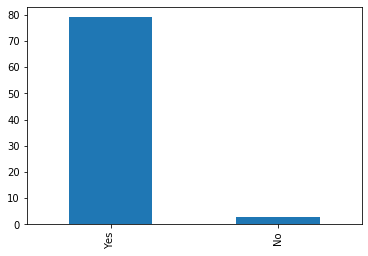

In [15]:
missing_qualification['Foreign_schooled'].value_counts()
missing_qualification['Foreign_schooled'].value_counts().plot(kind='bar', label='Foreign_schooled')

1. It looks like foreign schooled employees has the most number of missing qualification.
   - I made the following assumptions. 
        1. They either have not completed their university education(Interns included).
        2. Some are school dropouts or they deferred.
        3. Some are dealing with issues at school. 
        
- **Final Point: From the above assumptions it makes sense to say they don't have a university degree/qualification.**

- But we should confirm from the main dataset to see the distribution of the school location.

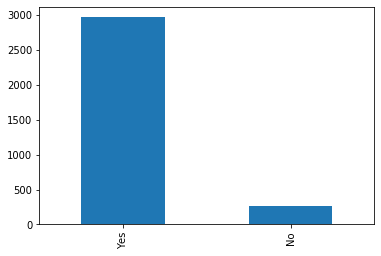

In [89]:
# Value counts prints the counts of each column value then I used barplot to visualize the counts

promoted['Foreign_schooled'].value_counts().plot(kind='bar', label='Foreign_schooled')

- Strange, Is it? We have same insight here. Majority of employees are foreign trained.
- What's the percentage?

In [88]:
#get the length of the foreign trained divided by the length of the locally trained and then multiply by 100

percentage_of_foriegn_school_employees = len(promoted[promoted['Foreign_schooled']=='Yes'])/len(promoted['Foreign_schooled'])*100
percentage_of_Nonforiegn_school_employees = 100 - percentage_of_foriegn_school_employees
print('The % of forigned schooled employees is {}%' .format(round(percentage_of_foriegn_school_employees)))
print('The % of Non-forigned schooled employees is {}%' .format(round(percentage_of_Nonforiegn_school_employees)))

The % of forigned schooled employees is 92%
The % of Non-forigned schooled employees is 8%


- There you have it. 92% employees are forigned trained while 8% are locally trained

    - Wondering how I am going to deal with this?(Fill or Delete)?
    - I will replace the NaN values. But how do I do that?
    - It isn't a bad idea to replace with Non-University Education. Good thing we have that value in our foreign school column

In [90]:
promoted['Qualification'] = promoted['Qualification'].replace(np.NaN, 'Non-University Education')

/home/godwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- Let's check the ages of each graduate.

Text(0.5, 1.0, 'Number of Employees in each Age Range')

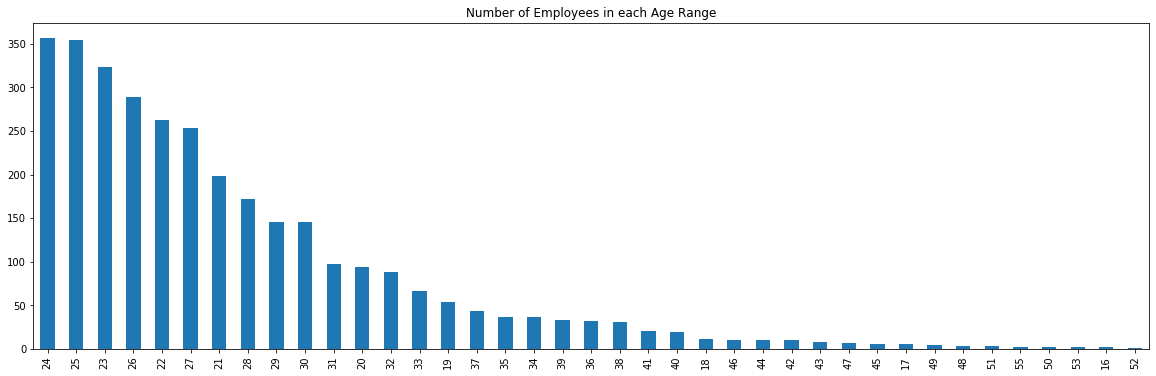

In [102]:
fig, ax = plt.subplots(figsize=(20,6))
promoted['Age_of_Employment'].value_counts().plot(ax=ax, kind='bar')
plt.title('Number of Employees in each Age Range')

Text(0.5, 1.0, 'Qualification Distribution in each Division')

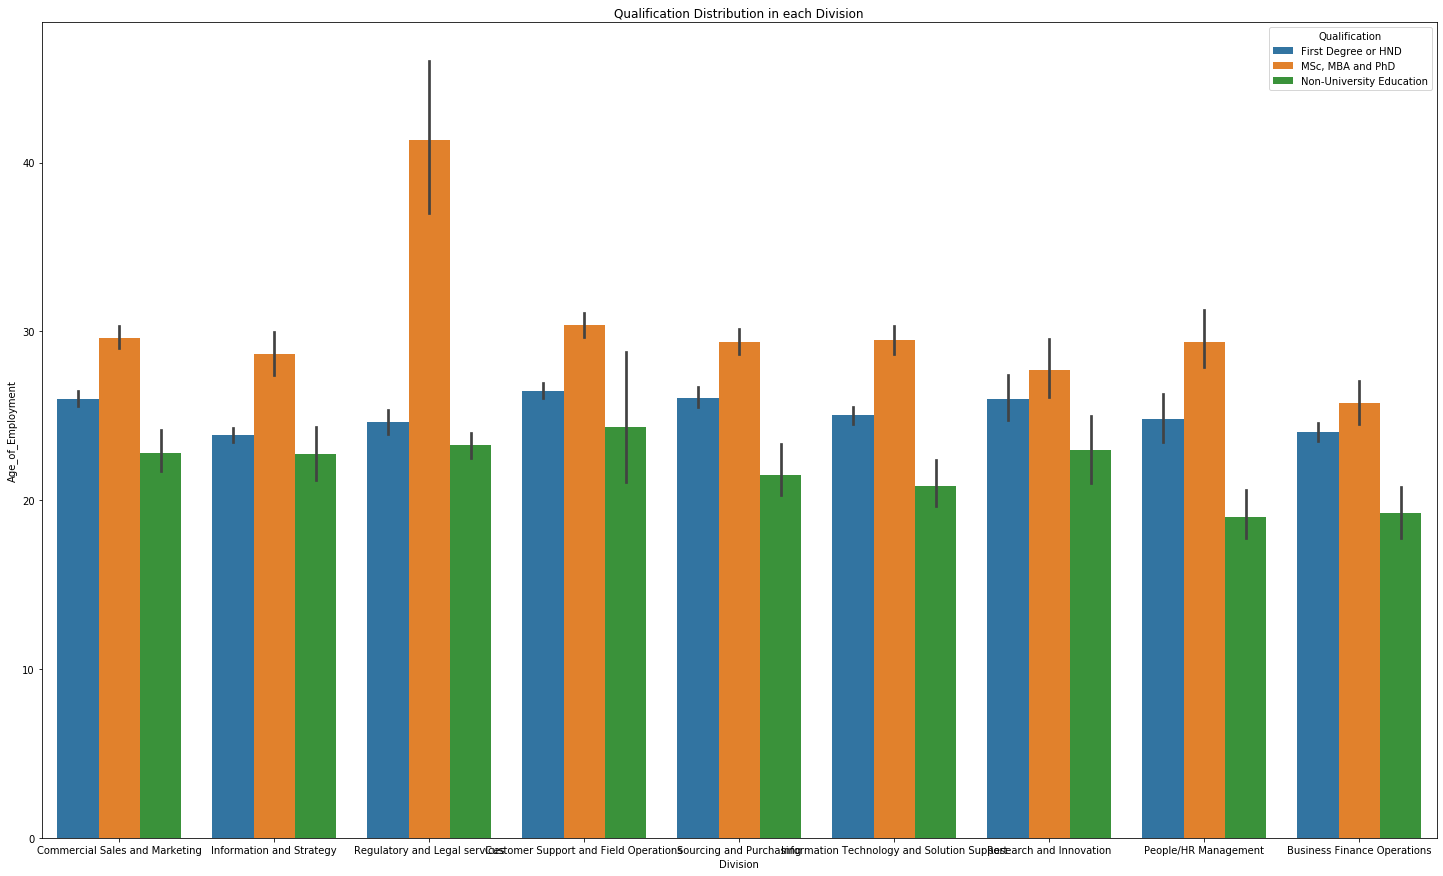

In [101]:
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(promoted['Division'], promoted['Age_of_Employment'], hue=promoted['Qualification'], data=promoted, ax=ax)
plt.title('Qualification Distribution in each Division')

- From the plot above, You can see that in every department. The oldest employees usually have the highest qualification.
- Business finance operation has the least postgraduate employees.
- People HR management leads the First degree and HND chart.
- Business Finance department has the least first degree holder.
- Customer support and field operation leads the non degree holders chart.
- People and HR has the least non degree holders chart
- Also notice that in all the devisions. No first degree holder is above 30 years of age.
- Also, Except for the legal service department, the highest age range for postgraduate employees are within 30 - 33

Text(0.5, 1.0, 'Training Attended by Gender ain each Division')

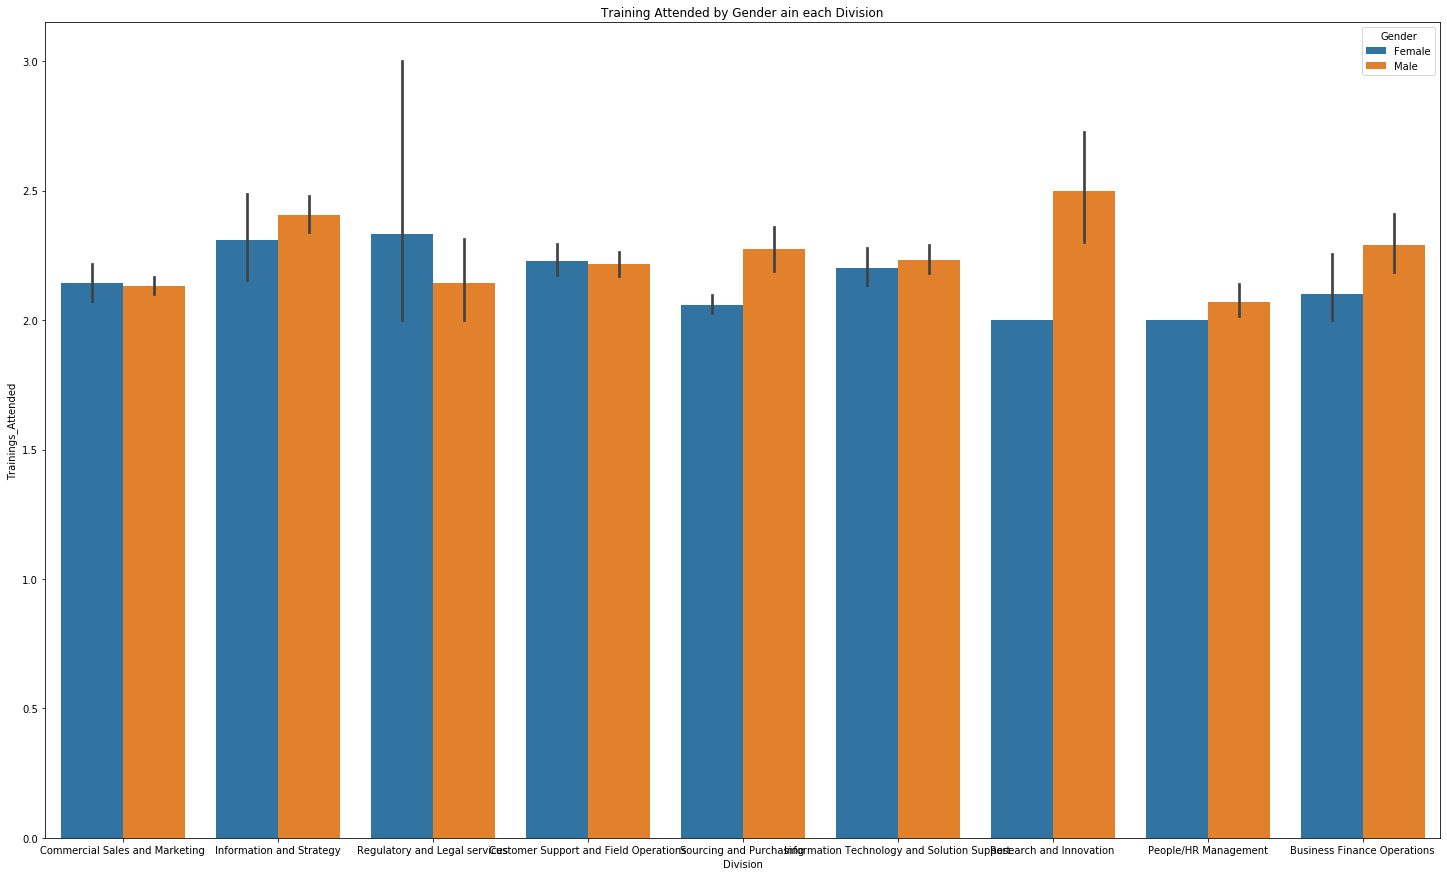

In [100]:
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(promoted['Division'], promoted['Trainings_Attended'], hue=promoted['Gender'], data=promoted, ax=ax)
plt.title('Training Attended by Gender ain each Division')

1. Female employees took part in less training than males in 5 department to be precise.
2. Commercial sales and marketing, regulatory and legal service, support and field operation
3. How did this women do in their last performance? especially in this department.

Text(0.5, 1.0, 'Gender Performance Score in each Division')

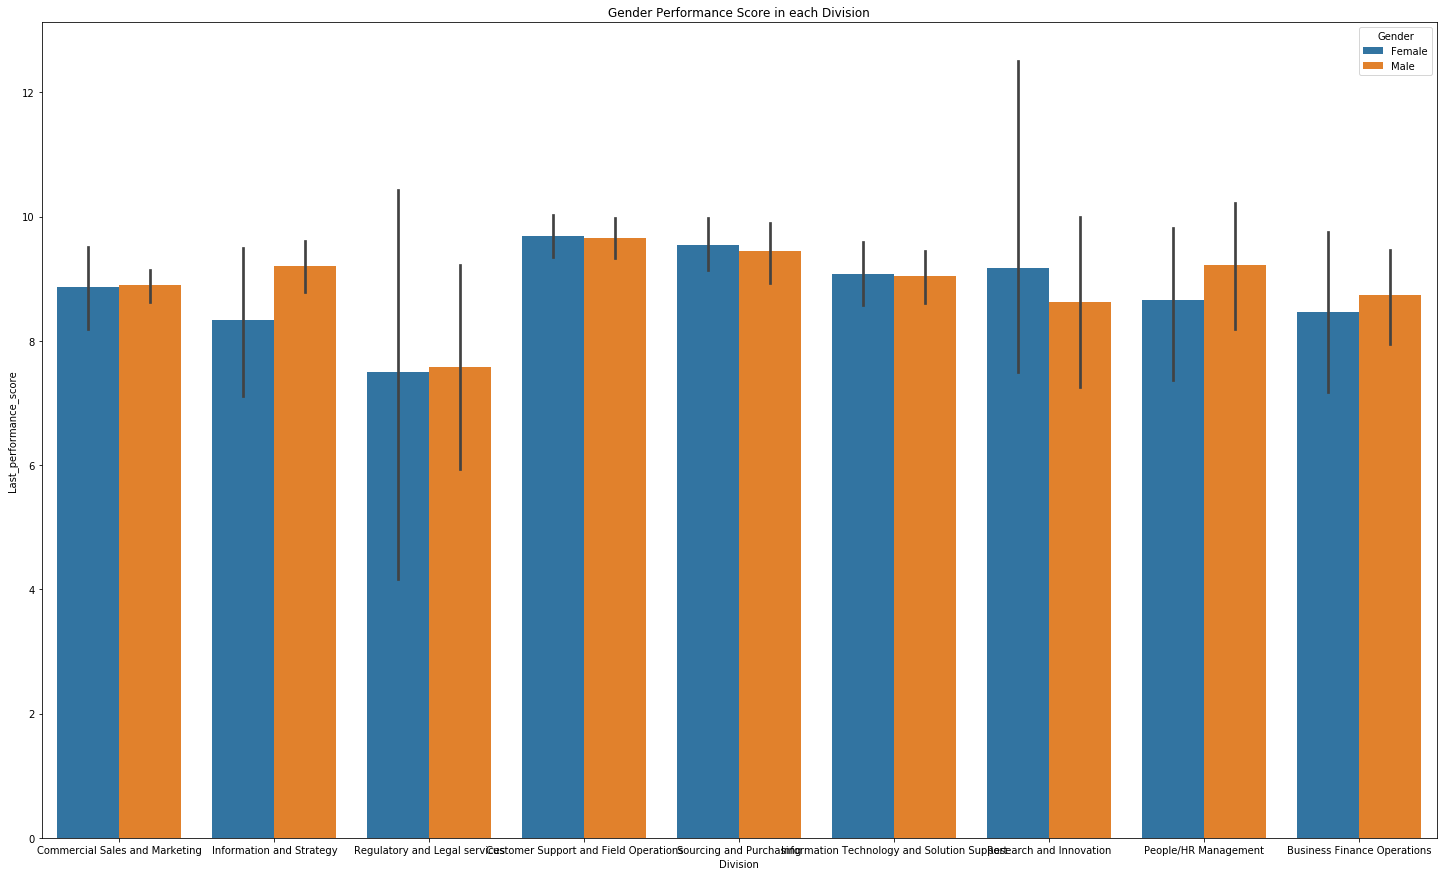

In [99]:
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(promoted['Division'], promoted['Last_performance_score'], hue=promoted['Gender'], data=promoted, ax=ax)
plt.title('Gender Performance Score in each Division')

Now we look at the performance of each division and group them by the gender.
    1. Female dominates in 4 divisions with slight margins. Except for some few outliers.
    2. Males dominate in 5 divisions. The dominace is well stated.
    3. High score distribution is between 8 to 10 except for some few outliers. I guess exceptional individuals.
For our comparison. Performance against training attended.
    4. Male performed slighly better here in the Commercial Sales and Marketing Division.(A tight battle)
    5. Males also performed better in the Regulatory and Legal Services.(A tight battle)
    6. Women performed slightly better in the Customer Support and Field Operation Division.
    7. Women performed better in the Sourcing and Purchasing Division
    8. In the Information technology and Solution Support Division, women performed better.
    9. Research and Innovation also. Females had the overall best performance.
   10. Males dominated the others in accordance to their training,

Text(0.5, 1, 'Training score average by Age')

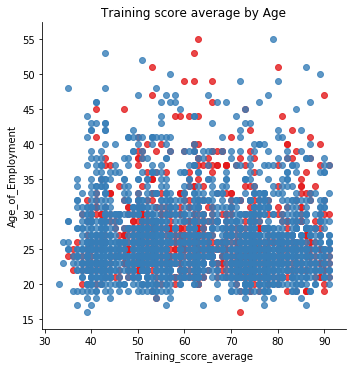

In [98]:
# Use seaborn implot to plot a scatterplot of the age of employment and training score and group them by gender,
sns.lmplot( x='Training_score_average', y='Age_of_Employment', data=promoted, fit_reg=False, hue='Gender', legend=False, palette="Set1")
plt.title('Training score average by Age')